In [22]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, means, stds):
        self.n_arms = len(means)
        self.means = means
        self.stds = stds

    def pull(self, action):
        return np.random.normal(self.means[action], self.stds[action])

means = [1.0, 1.5, 2.0, 2.5, 3.0]
stds = [1.0] * 5
optimal_arm = int(np.argmax(means))
env = MultiArmedBandit(means, stds)


## 📊 Evaluation Function
Calculates cumulative reward, regret, optimal action %, and exploration efficiency.

In [23]:
def evaluate(results, optimal_arm, optimal_mean):
    actions = results["actions"]
    rewards = np.array(results["rewards"])
    steps = len(actions)

    cumulative_rewards = np.cumsum(rewards)
    regret = np.cumsum([optimal_mean - means[a] for a in actions])
    optimal_action_count = np.cumsum([1 if a == optimal_arm else 0 for a in actions])
    optimal_action_percentage = optimal_action_count / (np.arange(steps) + 1)

    exploration_efficiency = np.argmax(optimal_action_percentage >= 0.9) if np.any(optimal_action_percentage >= 0.9) else steps

    return cumulative_rewards, regret, optimal_action_percentage, exploration_efficiency


In [24]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, means, stds):
        self.n_arms = len(means)
        self.means = means
        self.stds = stds

    def pull(self, action):
        return np.random.normal(self.means[action], self.stds[action])

means = [1.0, 1.5, 2.0, 2.5, 3.0]
stds = [1.0] * 5
optimal_arm = int(np.argmax(means))
env = MultiArmedBandit(means, stds)


📊 Evaluation Function
Calculates cumulative reward, regret, optimal action %, and exploration efficiency.

In [25]:
def evaluate(results, optimal_arm, optimal_mean):
    actions = results["actions"]
    rewards = np.array(results["rewards"])
    steps = len(actions)

    cumulative_rewards = np.cumsum(rewards)
    regret = np.cumsum([optimal_mean - means[a] for a in actions])
    optimal_action_count = np.cumsum([1 if a == optimal_arm else 0 for a in actions])
    optimal_action_percentage = optimal_action_count / (np.arange(steps) + 1)

    exploration_efficiency = np.argmax(optimal_action_percentage >= 0.9) if np.any(optimal_action_percentage >= 0.9) else steps

    return cumulative_rewards, regret, optimal_action_percentage, exploration_efficiency


🎯 Greedy

In [26]:
def run_greedy(env, steps=1000):
    Q = np.zeros(env.n_arms)
    N = np.zeros(env.n_arms)
    actions, rewards = [], []

    for t in range(steps):
        action = np.argmax(Q)
        reward = env.pull(action)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

        actions.append(action)
        rewards.append(reward)

    return {"actions": actions, "rewards": rewards}

greedy_results = run_greedy(env)
greedy_metrics = evaluate(greedy_results, optimal_arm, means[optimal_arm])


VI. Decaying Epsilon-Greedy

In [27]:
def run_decay_epsilon_greedy(env, steps=1000, epsilon_start=1.0, decay_rate=0.005):
    Q = np.zeros(env.n_arms)
    N = np.zeros(env.n_arms)
    actions, rewards = [], []

    for t in range(steps):
        epsilon = epsilon_start * np.exp(-decay_rate * t)
        if np.random.rand() < epsilon:
            action = np.random.randint(env.n_arms)
        else:
            action = np.argmax(Q)
        reward = env.pull(action)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        actions.append(action)
        rewards.append(reward)

    return {"actions": actions, "rewards": rewards}

decay_results = run_decay_epsilon_greedy(env)
decay_metrics = evaluate(decay_results, optimal_arm, means[optimal_arm])


 Plot Metrics and Exploration Efficiency

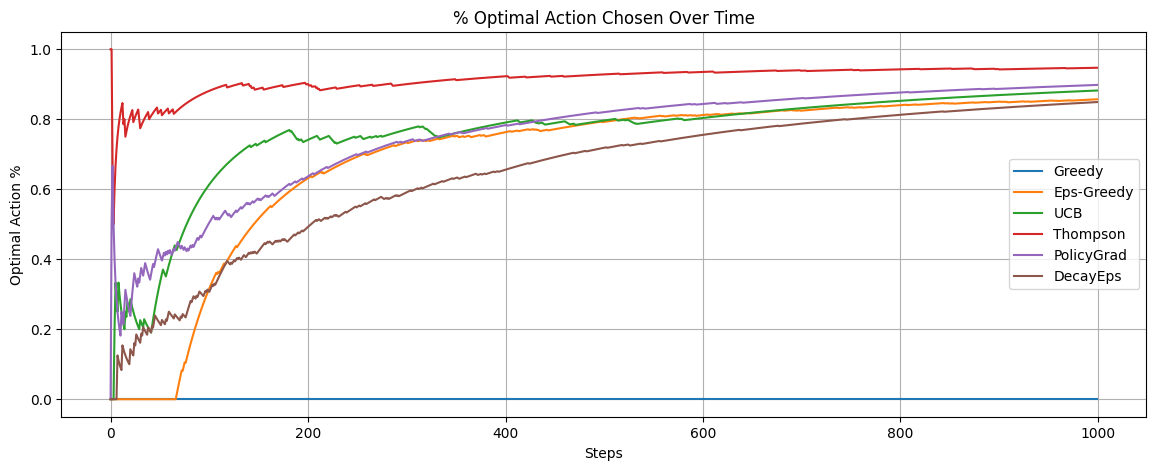

In [28]:
import matplotlib.pyplot as plt

algorithms = {
    "Greedy": greedy_metrics,
    "Eps-Greedy": eps_metrics,
    "UCB": ucb_metrics,
    "Thompson": ts_metrics,
    "PolicyGrad": pg_metrics,
    "DecayEps": decay_metrics
}

plt.figure(figsize=(14, 5))

for name, (reward, regret, opt_pct, _) in algorithms.items():
    plt.plot(opt_pct, label=name)

plt.title("% Optimal Action Chosen Over Time")
plt.xlabel("Steps")
plt.ylabel("Optimal Action %")
plt.legend()
plt.grid(True)
plt.show()
